# Objective 01 - implement cross-validation with independent test set

In [38]:
# import the libraries
import numpy as np
from sklearn import datasets
from sklearn.model_selection import KFold, cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

In [39]:
# load the digits data

# the digits with 10 class (digits 0-9)
digits = datasets.load_digits(n_class=10)

# create the feature matrix
features = digits.data
print('The shape of the feature matrix: ', features.shape)

# create the target array
target = digits.target
print('The shape of the target array: ', target.shape)
print('The unique class in the target: ', np.unique(target.shape))

The shape of the feature matrix:  (1797, 64)
The shape of the target array:  (1797,)
The unique class in the target:  [1797]


In [40]:
# instantiate the standardizer
standardizer = StandardScaler()

#instantiate the classifier
logreg = LogisticRegression(max_iter = 150)

# create the pipeline
pipeline = make_pipeline(standardizer, logreg)

#instantiate the k-fold cross-validation
kfold_cv = KFold(n_splits=5, shuffle=True, random_state=11)

In [41]:
# fit the model using k-fold cross-validation
cv_scores = cross_val_score(pipeline, features, target, cv=kfold_cv, scoring='accuracy')

In [42]:
#print all the mean score
print('All cv scores: ', cv_scores)

# print the mean score
print('Mean of all cv scores: ', cv_scores.mean())

All cv scores:  [0.97222222 0.96944444 0.95543175 0.97493036 0.98050139]
Mean of all cv scores:  0.9705060352831941


# Objective 02 - use scikit-learn for hyperparameter optimization

In [43]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import validation_curve

In [44]:
#load the data digits

# the deafult with 10 classes (digits(0-9)
digits  = datasets.load_digits(n_class=10)

#create the feature matrix
X = digits.data
print('The shape of the feature matrix: ', X.shape)

#create the target array
y = digits.target
print('The shape of the target array: ', y.shape)
print('The unique class in the target: ', np.unique(y))

The shape of the feature matrix:  (1797, 64)
The shape of the target array:  (1797,)
The unique class in the target:  [0 1 2 3 4 5 6 7 8 9]


In [45]:
#create the validation_curve
depth = range(1,30,3)
train_scores, test_scores = validation_curve(DecisionTreeClassifier(), X, y, param_name = 'max_depth', param_range=depth, scoring='accuracy', n_jobs=-1)

train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

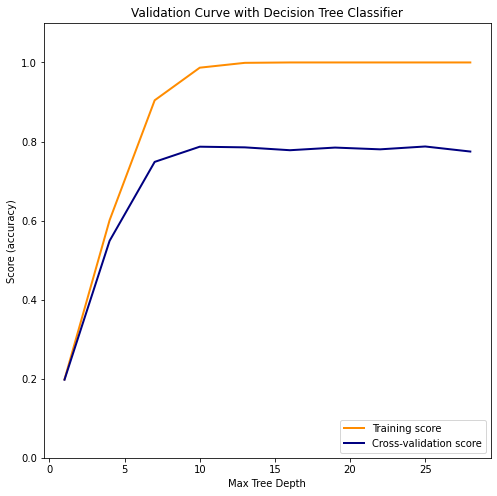

In [46]:
# Plot the validation curve
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(8,8))

ax.plot(depth, train_scores_mean, label="Training score",
             color="darkorange", lw=2)
ax.plot(depth, test_scores_mean, label="Cross-validation score",
             color="navy", lw=2)

ax.set_title("Validation Curve with Decision Tree Classifier")
ax.set_xlabel("Max Tree Depth")
ax.set_ylabel("Score (accuracy)")
ax.set_ylim(0.0, 1.1)

ax.legend(loc='lower right')


## Parameters search

In [47]:
# import the necessary modules
from scipy.stats import randint
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV

# setup the parameters and distribution to sample from: param_dist
param_dist = {"max_depth": [3, None], "max_features": randint(1,9),"min_samples_leaf":randint(1,9),              "criterion":['gini', 'entropy']}

#instantiate the Decision Tree classifier: Tree
tree = DecisionTreeClassifier()

#instantiate the RandomizedSearchCV object: tree_cv
tree_cv = RandomizedSearchCV(tree, param_dist, cv=5)

#fit the data
tree_cv.fit(X,y)

#pritn the tuned parameters and score
print(f'Tuned Decision Tree Parameters: {tree_cv.best_params_}')
print(f'Best score is {tree_cv.best_score_}')

Tuned Decision Tree Parameters: {'criterion': 'gini', 'max_depth': None, 'max_features': 5, 'min_samples_leaf': 1}
Best score is 0.7318167749922624


In [53]:
#display the cv results by ranking the test scores
import pandas as pd
pd.DataFrame(tree_cv.cv_results_).sort_values(by='rank_test_score').T

,2,8,7,6,1,5,4,3,0,9
mean_fit_time,0.00159545,0.00228205,0.00191135,0.00137944,0.00145788,0.0012702,0.000989342,0.000944328,0.00126619,0.000964689
std_fit_time,0.000112227,0.000307193,0.000385128,1.48918e-05,7.09712e-05,8.0476e-05,7.31902e-05,7.85674e-05,0.000198305,4.63444e-05
mean_score_time,0.000242662,0.00036006,0.000297451,0.000237846,0.000263882,0.000243664,0.000235271,0.000234175,0.000253725,0.000222063
std_score_time,8.64825e-06,0.000144161,4.86237e-05,6.10947e-06,1.93841e-05,9.88791e-07,3.95918e-06,2.65235e-06,1.35571e-05,2.04874e-06
param_criterion,gini,entropy,gini,gini,entropy,entropy,gini,gini,entropy,entropy
param_max_depth,None,None,None,None,None,None,None,None,None,3
param_max_features,5,7,6,4,3,1,2,2,2,7
param_min_samples_leaf,1,6,4,2,5,1,3,4,4,3
params,"{'criterion': 'gini', 'max_depth': None, 'max_...","{'criterion': 'entropy', 'max_depth': None, 'm...","{'criterion': 'gini', 'max_depth': None, 'max_...","{'criterion': 'gini', 'max_depth': None, 'max_...","{'criterion': 'entropy', 'max_depth': None, 'm...","{'criterion': 'entropy', 'max_depth': None, 'm...","{'criterion': 'gini', 'max_depth': None, 'max_...","{'criterion': 'gini', 'max_depth': None, 'max_...","{'criterion': 'entropy', 'max_depth': None, 'm...","{'criterion': 'entropy', 'max_depth': 3, 'max_..."
split0_test_score,0.738889,0.752778,0.697222,0.669444,0.686111,0.669444,0.566667,0.55,0.530556,0.438889
